<a href="https://colab.research.google.com/github/danilocucharro/ANALISE-E-PREVISAO-DA-GRAVIDADE-DE-ACIDENTES-FERROVIARIOS/blob/main/Acidentes_ferrovi%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

###Registros de acidentes ocorridos nos trechos concedidos às operadoras ferroviárias de 2004 á 2020, juntamente com o processo de monitoramento e análise dos dados no Sistema Acompanhamento de Fiscalização do Transporte Ferroviário (SAFF).

#Importações necessárias e conexão com o google drive

In [1]:
# Importações necessárias

# cálculos numéricos
import numpy as np

# ler, agrupar, organizar, explorar, filtrar, manipular e combinar dados
# suporta variados formatos, como CSV, Excel e JSON e que possibilita
# misturar diferentes bancos de dados simultaneamente
import pandas as pd

# criação de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# lidar com grandes quantidades de números, lidar com estatísticas, integração numérica,
# solução de equações diferenciais, otimização, integração, álgebra linear, funções especiais,
# polinômios
from scipy import stats

# aplicação prática de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Medidas de avaliação
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Separação dos arquivos treino, teste
from sklearn.model_selection import train_test_split

# Visualizar todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Leitura da base de dados

In [4]:
# Leitura da base em csv
df = pd.read_csv('dados/acidentes_ferroviarios_2004-2020.csv')

# qtde de linhas e colunas
print(df.shape)

(10824, 22)


#Significado das colunas

In [5]:
# Gravidade: Indica a gravidade do acidente ferroviário, geralmente classificada como sim ou não.

# Concessionaria: Nome da empresa concessionária responsável pela ferrovia onde ocorreu o acidente.

# Data_Ocorrencia: Data em que o acidente ferroviário ocorreu.

# Hora_Ocorrencia: Hora em que o acidente ferroviário ocorreu.

# UF: Sigla da Unidade Federativa (Estado) onde ocorreu o acidente.

# Municipio: Nome do município onde ocorreu o acidente.

# Linha: Identificação da linha ferroviária onde ocorreu o acidente.

# Quilômetro_Inicial: Quilômetro inicial do trecho da ferrovia onde ocorreu o acidente

# Estação_Anterior: Nome da estação ferroviária anterior ao local do acidente.

# Estação_Posterior: Nome da estação ferroviária posterior ao local do acidente.

# Perímetro_Urbano: Indica se o perímetro em que houve o acidente.

# Causa_direta: Causa do acidente ferroviário.

# Natureza: Natureza do acidente (ex: descarrilamento, colisão, atropelamento, etc.).

# Interrupção: Indica em valor númerico se houve interrupção no serviço ferroviário.

# Prefixo: Prefixo ou identificador do trem envolvido no acidente.

# Serviço_Transporte: Tipo de serviço de transporte realizado pelo trem envolvido no acidente.

# N_feridos: Número de feridos no acidente.

# N_obitos: Número de óbitos no acidente.

# Mercadoria: Tipo de mercadoria transportada pelo trem envolvido no acidente.

# Equipagem: Informações sobre o condutor do trem.

# Outra_Ferrovia: Indica se o acidente envolveu outra ferrovia além da principal (sim/não).

# PN: Indica se o acidente ocorreu em passagem de nível (sim/não).

#Listando as colunas do arquivo de dados

In [6]:
# Listando as colunas do arquivo de dados
df.columns

Index(['Gravidade', 'Concessionaria', 'Data_Ocorrencia', 'Hora_Ocorrencia',
       'UF', 'Municipio', 'Linha', 'Quilômetro_Inicial', 'Estação_Anterior',
       'Estação_Posterior', 'Perímetro_Urbano', 'Causa_direta', 'Natureza',
       'Interrupção', 'Prefixo', 'Serviço_Transporte', 'N_feridos', 'N_obitos',
       'Mercadoria', 'Equipagem', 'Outra_Ferrovia', 'PN'],
      dtype='object')

# Transformando a coluna Data_Ocorrencia em datetime e fragmentando em dia, mês e ano

In [7]:
# Sugestões de transformações de data
df['Data_Ocorrencia'] = pd.to_datetime(df.Data_Ocorrencia, dayfirst=True) # Define o tipo de dado para datetime

df['dia'] = df['Data_Ocorrencia'].dt.day # dia
df['mes'] = df['Data_Ocorrencia'].dt.month # Mês
df['ano'] = df['Data_Ocorrencia'].dt.year # ano

#Verificando a existência de dados faltantes

In [8]:
# Checando dados ausentes
df.isna().sum()

Gravidade                 0
Concessionaria            0
Data_Ocorrencia           0
Hora_Ocorrencia           0
UF                      158
Municipio               158
Linha                   137
Quilômetro_Inicial       97
Estação_Anterior        138
Estação_Posterior      6716
Perímetro_Urbano          1
Causa_direta            536
Natureza                189
Interrupção               0
Prefixo                 316
Serviço_Transporte     1742
N_feridos                 0
N_obitos                  0
Mercadoria             6630
Equipagem              2303
Outra_Ferrovia        10356
PN                        0
dia                       0
mes                       0
ano                       0
dtype: int64

#Checagem da Tabela de dados

In [9]:
# 3 Amostras aleatórias da tabela
df.sample(3)

,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Estação_Anterior,Estação_Posterior,Perímetro_Urbano,Causa_direta,Natureza,Interrupção,Prefixo,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,dia,mes,ano
6572,Não,EFC,2015-07-20,04:34,PA,Bom Jesus do Tocantins,Ponta da Madeira - Carajás,679.933,Marabá,NaN,Não,Material Rodante,Descarrilamento,8.5,M014,Cargas,0.0,0.0,NaN,RAMON DA SILVA GOMES,NaN,Não,20,7,2015
10024,Não,MRS,2019-11-03,00:35,SP,Suzano,Variante Rio Grande da Serra - Suzano,24.000,Cragea,Suzano Novo,Trecho Corrido,Casos Fortuitos ou de Força Maior,Atropelamento,1.7,HPN1104,Cargas,1.0,0.0,Celulose,FERNANDO NASCIMENTO DA SILVA,NaN,Não,3,11,2019
4081,Não,RMP,2012-09-22,12:40,SP,Guatapara,Itirapina - Colômbia,305.904,Guatapara,NaN,Não,Atos de vandalismo,Descarrilamento,3.0,L58,Cargas,0.0,0.0,NaN,GERSON ANTONIO FUSCO,NaN,Não,22,9,2012


In [10]:
# Estatísticas do dataset
df.describe()

,Data_Ocorrencia,Interrupção,N_feridos,N_obitos,dia,mes,ano
count,10824,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000
mean,2014-01-06 18:32:59.600887040,4.736317,0.343311,0.101903,15.649021,6.534738,2013.516814
min,2004-01-02 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,2004.000000
25%,2011-04-21 00:00:00,0.000000,0.000000,0.000000,8.000000,4.000000,2011.000000
50%,2014-03-28 00:00:00,1.400000,0.000000,0.000000,16.000000,7.000000,2014.000000
75%,2017-07-30 00:00:00,5.000000,1.000000,0.000000,23.000000,9.000000,2017.000000
max,2020-11-30 00:00:00,504.000000,35.000000,9.000000,31.000000,12.000000,2020.000000
std,NaN,12.568514,0.944953,0.329436,8.730346,3.391280,4.248636


In [11]:
# Informações do dataset como data type, quantidades, dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10824 entries, 0 to 10823
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gravidade           10824 non-null  object        
 1   Concessionaria      10824 non-null  object        
 2   Data_Ocorrencia     10824 non-null  datetime64[ns]
 3   Hora_Ocorrencia     10824 non-null  object        
 4   UF                  10666 non-null  object        
 5   Municipio           10666 non-null  object        
 6   Linha               10687 non-null  object        
 7   Quilômetro_Inicial  10727 non-null  object        
 8   Estação_Anterior    10686 non-null  object        
 9   Estação_Posterior   4108 non-null   object        
 10  Perímetro_Urbano    10823 non-null  object        
 11  Causa_direta        10288 non-null  object        
 12  Natureza            10635 non-null  object        
 13  Interrupção         10824 non-null  float64   

#Análise da frequência absoluta dos meses que tiveram acidentes

<ipython-input-12-acc0837e96c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nome_mes', data=df, palette="Set1")


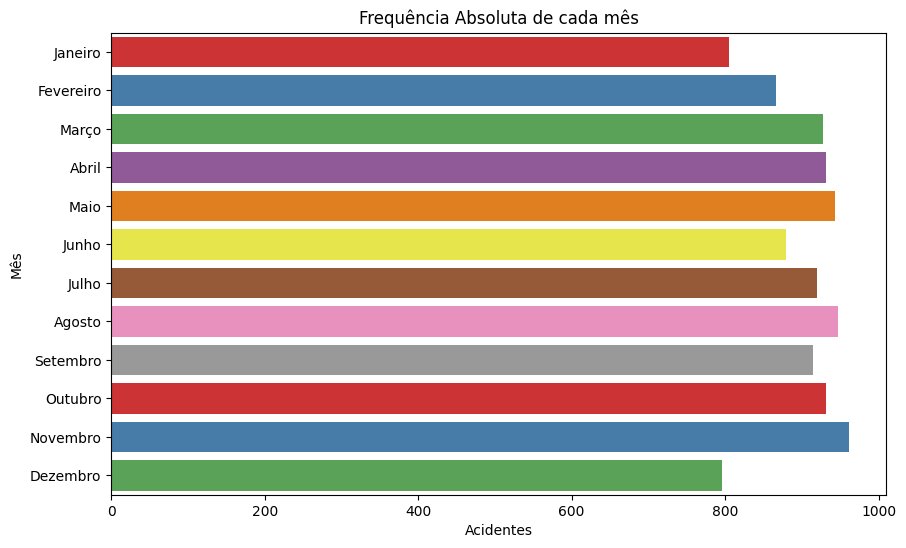

In [12]:
meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Criar uma nova coluna com o nome do mês
df['nome_mes'] = df['mes'].map(meses)

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.countplot(y='nome_mes', data=df, palette="Set1")
plt.title('Frequência Absoluta de cada mês')
plt.xlabel('Acidentes')
plt.ylabel('Mês')
plt.show()

###Com base no gráfico acima, que está nos fornecendo a análise da frequência absoluta de todos os acidentes registrados, podemos dizer que durante os anos de 2004 á 2020, o mês de Novembro foi o que mais registrou ocorrências durante esse tempo, e o mês com a menor frequência de ocorrências durante esse tempo foi Dezembro.

###Este resultado pode estar relacionado a quantidade de feriados de final de ano que acontecem no mês de Dezembro, fazendo com que esse mês tenha uma quantidade menor de circulação de trens, e esse efeito pode influenciar diretamente tanto no baixo índice que acidentes em Dezembro quanto na alta em Novembro.

###Abaixo temos uma representação em gráfico de pizza com a análise da frequência percentual:

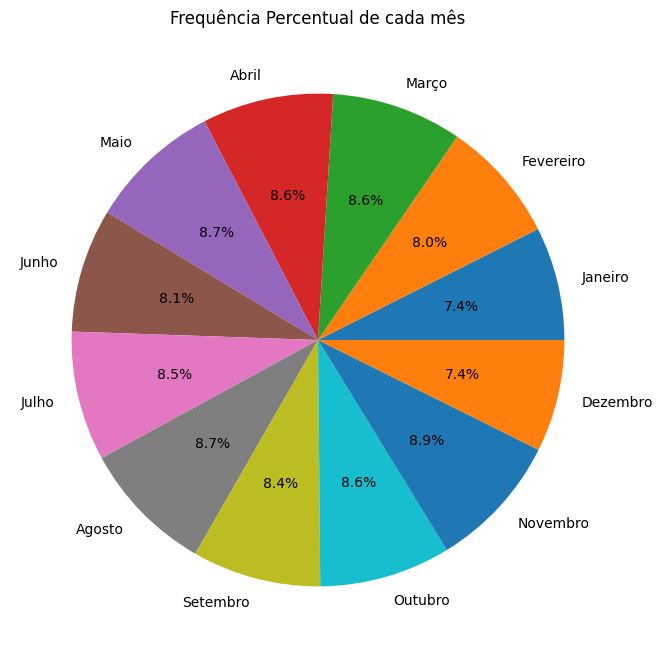

In [13]:
#Frequência percentual dos meses que tiveram acidentes
meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Supondo que 'df' seja o seu DataFrame e 'variavel' seja a variável que você quer visualizar
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário
frequencia_percentual = df['mes'].value_counts(normalize=True) * 100
frequencia_ordenada = frequencia_percentual.sort_index()  # Ordenando os valores pelos índices
frequencia_ordenada.index = frequencia_ordenada.index.map(meses)  # Mapeando os índices para os nomes dos meses
plt.pie(frequencia_ordenada, labels=frequencia_ordenada.index, autopct='%1.1f%%')
plt.title('Frequência Percentual de cada mês')
plt.show()

#Análise da frequência absoluta dos Estados onde foram relatados os acidentes

<ipython-input-14-93ec80a8a46b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='UF', data=df, order=estado_ordem, palette="Set1")


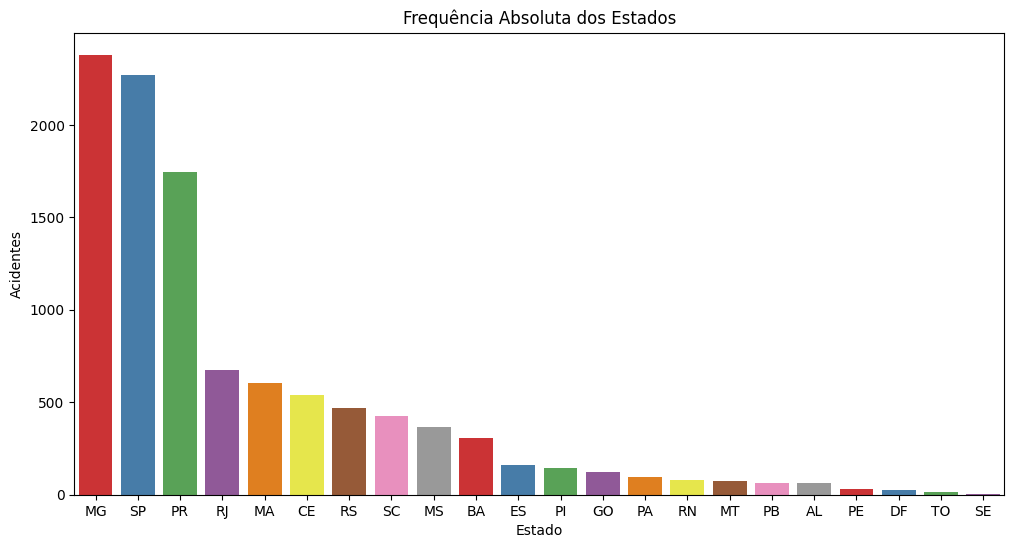

In [14]:
estado_contagem = df['UF'].value_counts()

# Ordenar os estados em ordem decrescente de acidentes
estado_ordem = estado_contagem.index

# Criar o gráfico de barras ordenado
plt.figure(figsize=(12, 6))
sns.countplot(x='UF', data=df, order=estado_ordem, palette="Set1")
plt.title('Frequência Absoluta dos Estados')
plt.xlabel('Estado')
plt.ylabel('Acidentes')
plt.show()

###Dentro do gráfico apresentado para a análise da frequência absoluta dos acidentes ocorridos em cada estado do País de 2004 á 2020, temos Minas Gerais como o estado que mais registrou acidentes ferroviários, e o estado que menos registrou ocorrências foi Sergipe.

###Abaixo temos o gráfico com a análise da frequência percentual:

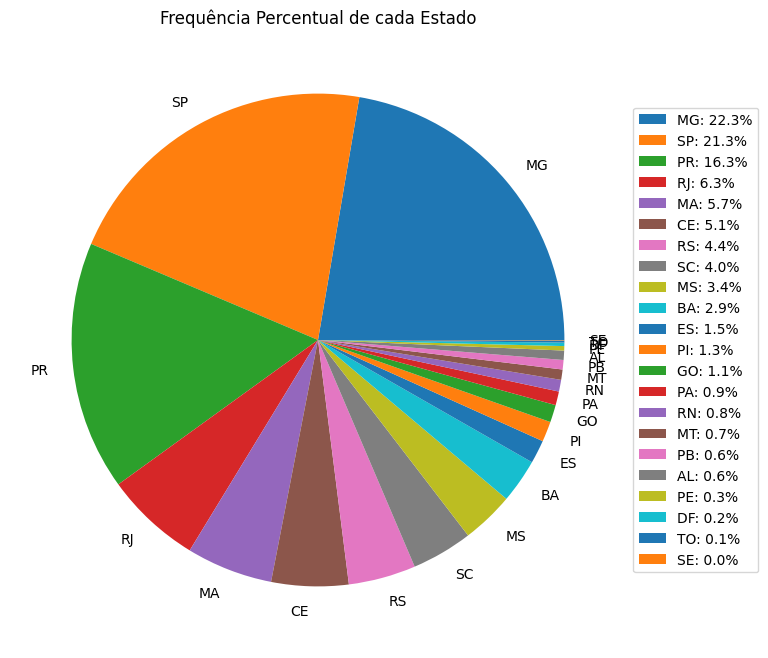

In [15]:
plt.figure(figsize=(8, 8))
frequencia_percentual = df['UF'].value_counts(normalize=True) * 100
valores = frequencia_percentual.values
labels = ['{0}: {1:1.1f}%'.format(i, j) for i, j in zip(frequencia_percentual.index, valores)]
plt.pie(frequencia_percentual, labels=frequencia_percentual.index, autopct='')
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Frequência Percentual de cada Estado')
plt.show()

#Número de acidentes por tipo de transporte do trem

<ipython-input-16-4b73b5c1ea12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.countplot(y='Serviço_Transporte', data=df_top_5_tipos, palette="Set1")


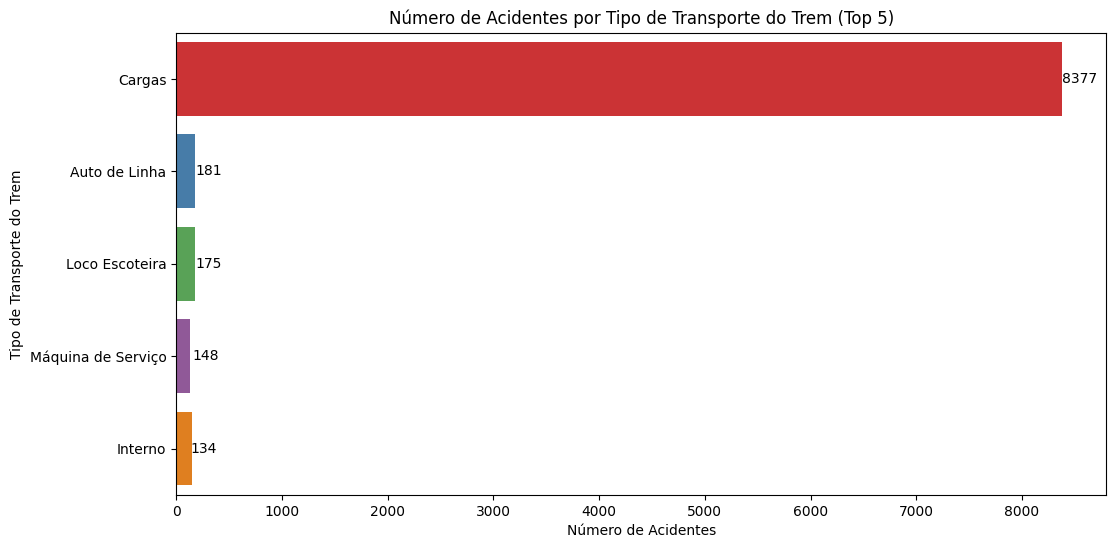

Serviço_Transporte
Cargas                  8377
Auto de Linha            181
Loco Escoteira           175
Interno                  148
Máquina de Serviço       134
Passageiros               38
Cargas Cargas             15
                           7
Cargas Cargas Cargas       1
Auto de Linha Cargas       1
Name: count, dtype: int64


In [16]:
contagem_por_tipo = df['Serviço_Transporte'].value_counts().sort_values(ascending=False)

# Selecionar os cinco tipos de transporte mais presentes
top_5_tipos = contagem_por_tipo.head(5)

df_top_5_tipos = df[df['Serviço_Transporte'].isin(top_5_tipos.index)]

# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
grafico = sns.countplot(y='Serviço_Transporte', data=df_top_5_tipos, palette="Set1")
plt.title('Número de Acidentes por Tipo de Transporte do Trem (Top 5)')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Transporte do Trem')

# Adicionar os valores exatos em cada barra
for i, v in enumerate(top_5_tipos.values):
    grafico.text(v + 3, i, str(v), color='black', va='center')

plt.show()
print(contagem_por_tipo.head(10))

###Com base no gráfico acima, a maior parte dos acidentes ferroviários estiveram transportando cargas diversas em suas viagens.

###Isso se da por conta de que a maioria dos transportes em ferrovias estão sempre transportando produtos diversos, ao invés de passageiros, não é atoa que durante todo esse período (2004-2020) foram registrados apenas 38 acidentes com passageiros na viagem.

#Ocorrências de acidentes por ano

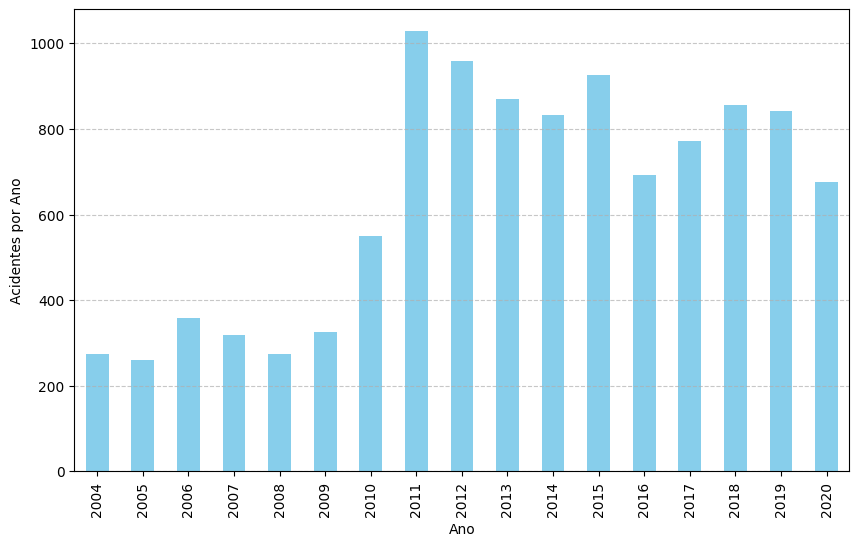

ano
2004     275
2005     261
2006     359
2007     320
2008     274
2009     327
2010     550
2011    1028
2012     959
2013     870
2014     833
2015     926
2016     693
2017     773
2018     856
2019     843
2020     677
Name: count, dtype: int64

In [17]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
total_acidentes_por_ano = df['ano'].value_counts().sort_index()
total_acidentes_por_ano.plot(kind='bar', color='skyblue')
plt.ylabel('Acidentes por Ano')
plt.xlabel('Ano')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona linhas na horizontal
plt.show()
total_acidentes_por_ano

###Neste gráfico acima podemos ver que o ano de 2011 foi o que mais registrou acidentes durante o período de 2004 á 2020, também vemos que 2005 foi o ano com a menor quantidade de acidentes registrados.

###É importante analisarmos também que após o ano de 2009, o gráfico apresenta uma alta em 2010 maior que a própria média de acidentes entre os anos de 2004 á 2009, e isso pode ter sido um reflexo da falta de dados documentados durante esse período (2004-2009) ou até mesmo por diversos outros fatores naturais.

#Número de acidentes registrados por tipo de Natureza

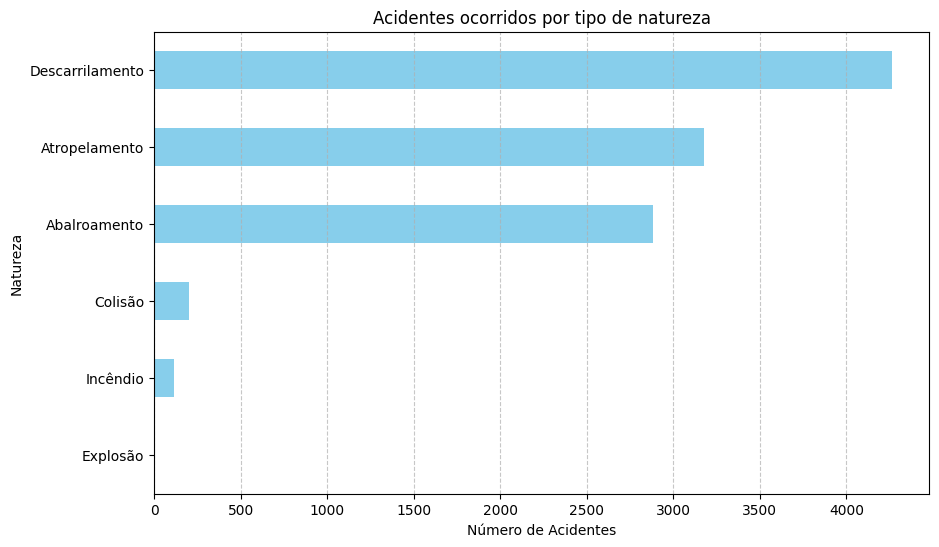

In [18]:
plt.figure(figsize=(10, 6))
total_acidentes_por_ano = df['Natureza'].value_counts().sort_values(ascending=True)
total_acidentes_por_ano.plot(kind='barh', color='skyblue')
plt.title('Acidentes ocorridos por tipo de natureza')
plt.xlabel('Número de Acidentes')
plt.ylabel('Natureza')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adiciona linhas de grade vertical
plt.show()

###O gráfico acima nos mostra que de todas as ocorrências de acidentes ferroviários durante 2004 e 2020, a maior natureza relacionada a eles foi Descarrilhamento, e a menor está relacionada a explosão com apenas dois casos.

#Acidentes ocorridos por tipo de causa

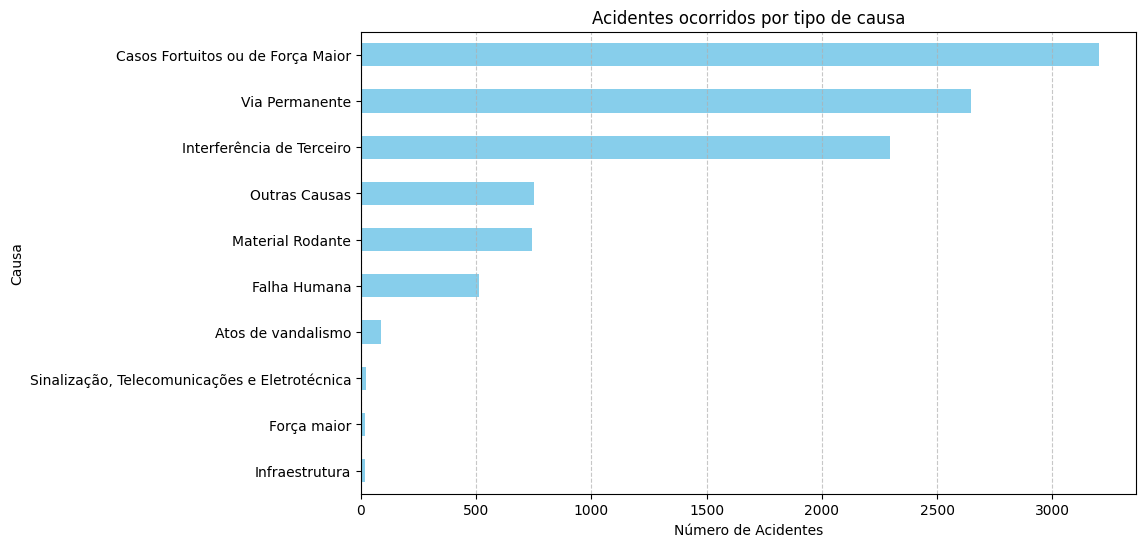

Causa_direta
Infraestrutura                                     17
Força maior                                        18
Sinalização, Telecomunicações e Eletrotécnica      20
Atos de vandalismo                                 89
Falha Humana                                      513
Material Rodante                                  741
Outras Causas                                     749
Interferência de Terceiro                        2294
Via Permanente                                   2645
Casos Fortuitos ou de Força Maior                3202
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(10, 6))
total_acidentes_por_ano = df['Causa_direta'].value_counts().sort_values(ascending=True)
total_acidentes_por_ano.plot(kind='barh', color='skyblue')
plt.title('Acidentes ocorridos por tipo de causa')
plt.xlabel('Número de Acidentes')
plt.ylabel('Causa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
total_acidentes_por_ano

###Neste gráfico podemos ver que a maior causa responsável pelos acidentes está relacionada a Casos fortuitos, ou seja, imprevistos durante a locomoção do trem, assim como, possiveis falhas técnicas durante a viagem, e a menor causa que o gráfico nos mostra está relacionada a infraestrutura da ferrovia, com apenas 17 acidentes durante esse período (2004-2020).

#Distribuição de Acidentes por Hora do Dia

<ipython-input-20-b73a4953d0bd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora_Ocorrencia']).dt.hour


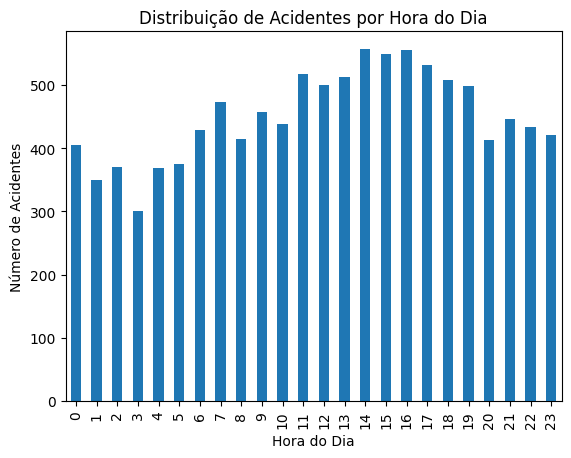

In [20]:
df['Hora'] = pd.to_datetime(df['Hora_Ocorrencia']).dt.hour
acidentes_por_hora = df['Hora'].value_counts().sort_index()
acidentes_por_hora.plot(kind='bar', title='Distribuição de Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.show()

###Neste gráfico podemos ver que entre às 14 e 16 horas da tarde foram registrados a maioria dos acidentes durante o período de 2004 á 2020. O horário com menos ocorrência foi às 3 horas da madrugada.

#Distribuição de Acidentes por Gravidade (Grave / Sem Gravidade)

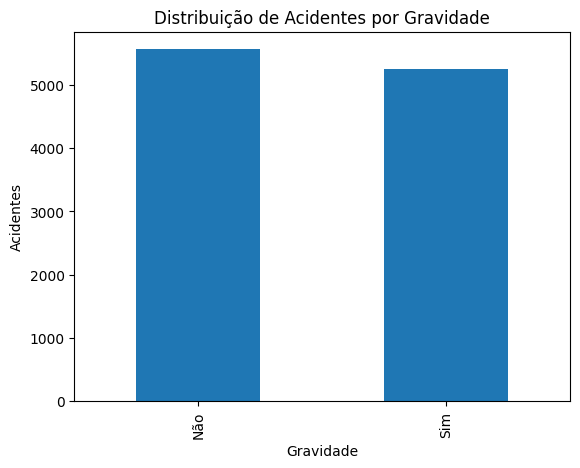

Gravidade
Não    5565
Sim    5259
Name: count, dtype: int64

In [21]:
acidentes_por_gravidade = df['Gravidade'].value_counts()
acidentes_por_gravidade.plot(kind='bar', title='Distribuição de Acidentes por Gravidade')
plt.xlabel('Gravidade')
plt.ylabel('Acidentes')
plt.show()
acidentes_por_gravidade

###Nesta representação vemos que a maioria dos acidentes ocorridos não foram considerados graves, mas apesar de não serem classificados como grave, a quantidade de acidentes dessa categoria não tem uma certa discrepância comparada com os acidentes graves. Então, mesmo os números de acidentes graves estando abaixo dos sem gravidade, os números com essa classificação ainda são altos.

#Os 10 municípios com mais ocorrências registradas no período de 2004 à 2020

<ipython-input-22-aac79999669b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Número de Acidentes', y='Municipio', data=top_10_municipios, palette='viridis')


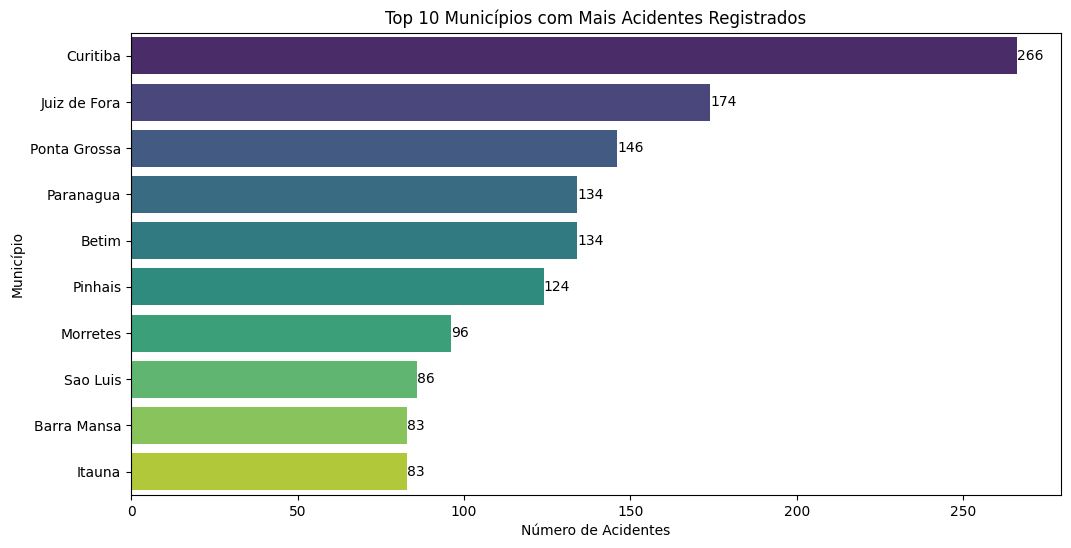

,Municipio,Número de Acidentes
0,Curitiba,266
1,Juiz de Fora,174
2,Ponta Grossa,146
3,Paranagua,134
4,Betim,134
5,Pinhais,124
6,Morretes,96
7,Sao Luis,86
8,Barra Mansa,83
9,Itauna,83


In [22]:
# Contar o número de acidentes por município
acidentes_por_municipio = df['Municipio'].value_counts().reset_index()
acidentes_por_municipio.columns = ['Municipio', 'Número de Acidentes']

# Selecionar os 10 municípios com mais acidentes
top_10_municipios = acidentes_por_municipio.head(10)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Número de Acidentes', y='Municipio', data=top_10_municipios, palette='viridis')
plt.title('Top 10 Municípios com Mais Acidentes Registrados')
plt.xlabel('Número de Acidentes')
plt.ylabel('Município')

# Adicionar rótulos com os valores exatos de cada município
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')

plt.show()
acidentes_por_municipio.head(12)

###O gráfico acima nos mostra que o município que mais registrou acidentes ferroviários entre o período de 2004 á 2020 foi Curitiba-PR, e que a maioria dos municípios apresentados estão dentro do estado do Paraná. Entre a lista dos 10 o Estado do Paraná contém 5 (Curitiba, Ponta Grossa, Paranaguá, Pinhais e Morretes).

###E dentre esses 10 municípios com mais ocorrências, os Municípios de Barra Mansa-RJ e Itaúna-MG foram os que menos tiveram acidentes. E mesmo São Paulo sendo o segundo maior estado em número de ocorrências deste tipo, essa lista não compõe nenhum dos municípios do estado de SP, isso significa que a maioria dos acidentes em São Paulo estão distribuidos em diversos outros municípios e não só focado em apenas um.

###Obs: O Município do estado de SP com mais ocorrências é a própria capital do estado com 79 ocorrências

#Boxplot do Número de Acidentes por Município em 2004

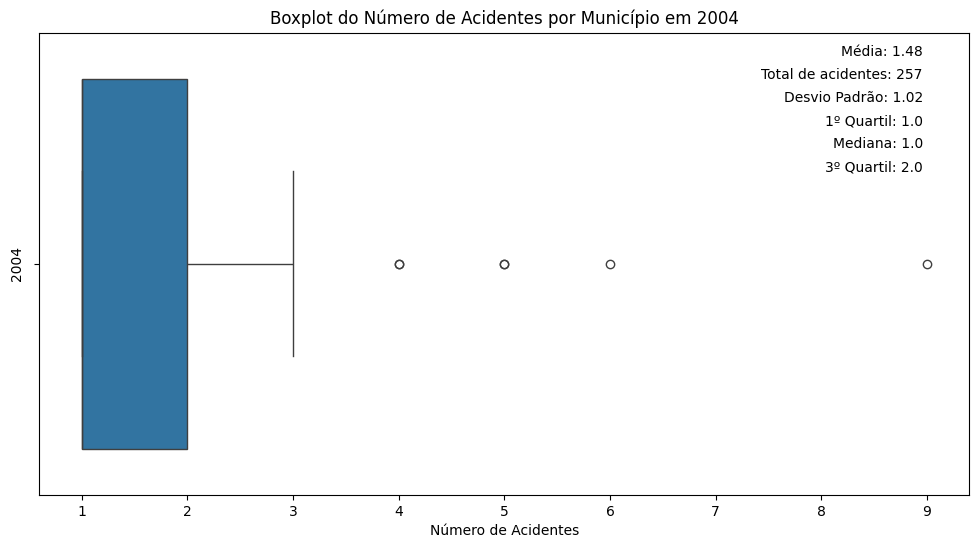

Municipio
Curitiba                9
Ribas do Rio Pardo      6
Betim                   5
Crateus                 5
Americana               4
Miranda                 4
Governador Valadares    3
Itaguai                 3
Codo                    3
Maraba                  3
Name: count, dtype: int64

In [23]:
df['Data_Ocorrencia'] = pd.to_datetime(df['Data_Ocorrencia'])
df['Ano'] = df['Data_Ocorrencia'].dt.year

# Filtrar os dados para os anos de 2004 e 2020
df_2004 = df[df['Ano'] == 2004]
df_2019 = df[df['Ano'] == 2019]

# Contar o número de acidentes por município para cada ano
acidentes_2004 = df_2004['Municipio'].value_counts().reset_index()
acidentes_2004.columns = ['Municipio', 'Número de Acidentes']

acidentes_2019 = df_2019['Municipio'].value_counts().reset_index()
acidentes_2019.columns = ['Municipio', 'Número de Acidentes']


# Calcular estatísticas para 2004
media_2004 = acidentes_2004['Número de Acidentes'].mean()
total_2004 = acidentes_2004['Número de Acidentes'].sum()
desvio_padrao_2004 = acidentes_2004['Número de Acidentes'].std()
quartil_1_2004 = acidentes_2004['Número de Acidentes'].quantile(0.25)
mediana_2004 = acidentes_2004['Número de Acidentes'].median()
quartil_3_2004 = acidentes_2004['Número de Acidentes'].quantile(0.75)

# Calcular estatísticas para 2020
media_2019 = acidentes_2019['Número de Acidentes'].mean()
total_2019 = acidentes_2019['Número de Acidentes'].sum()
desvio_padrao_2019 = acidentes_2019['Número de Acidentes'].std()
quartil_1_2019 = acidentes_2019['Número de Acidentes'].quantile(0.25)
mediana_2019 = acidentes_2019['Número de Acidentes'].median()
quartil_3_2019 = acidentes_2019['Número de Acidentes'].quantile(0.75)

# Criar boxplot para os acidentes de 2004
plt.figure(figsize=(12, 6))
sns.boxplot(x='Número de Acidentes', data=acidentes_2004)
plt.title('Boxplot do Número de Acidentes por Município em 2004')
plt.xlabel('Número de Acidentes')
plt.ylabel('2004')

plt.text(0.95, 0.95, f'Média: {media_2004:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.9, f'Total de acidentes: {total_2004}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f'Desvio Padrão: {desvio_padrao_2004:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.8, f'1º Quartil: {quartil_1_2004}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.75, f'Mediana: {mediana_2004}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.7, f'3º Quartil: {quartil_3_2004}', transform=plt.gca().transAxes, ha='right')

plt.show()

df_2004['Municipio'].value_counts().head(10)

###Através desse gráfico em boxplot vemos que o 3º quartil (75% dos acidentes registrados em cada município) está indicando que a maioria dos municípios tiveram 2 acidentes em 2004.
###Podemos também ver uma variância bem pequena nos acidentes, que acaba variando de 1 (1º quartil) à 2 (3º quartil), e temos a mediana (50%) indicando 1 acidente em 50 % dos municípios.
###Também é notória a presença de outliers, e o maior deles nos indica 9 acidentes em um único municipio, Curitiba.

#Boxplot do Número de Acidentes por Município em 2019

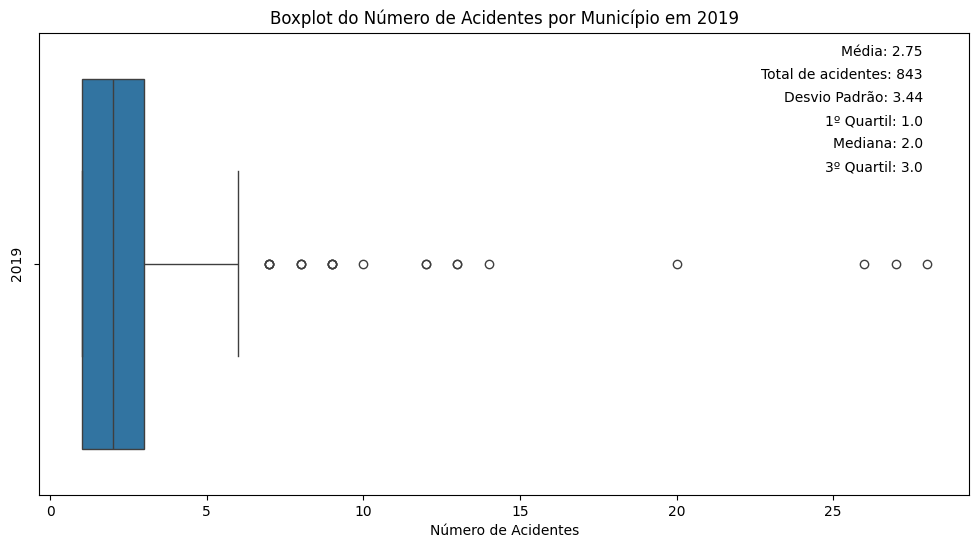

In [24]:
# Criar boxplot para os acidentes de 2020
plt.figure(figsize=(12, 6))
sns.boxplot(x='Número de Acidentes', data=acidentes_2019)
plt.title('Boxplot do Número de Acidentes por Município em 2019')
plt.xlabel('Número de Acidentes')
plt.ylabel('2019')

plt.text(0.95, 0.95, f'Média: {media_2019:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.9, f'Total de acidentes: {total_2019}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f'Desvio Padrão: {desvio_padrao_2019:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.8, f'1º Quartil: {quartil_1_2019}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.75, f'Mediana: {mediana_2019}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.7, f'3º Quartil: {quartil_3_2019}', transform=plt.gca().transAxes, ha='right')

plt.show()

###Neste outro boxplot com dados de acidentes no ano de 2019 temos uma variância do 1º quartil de 1 acidente á 3 acidentes por município no 3º quartil, e uma mediana (50%) de 2 acidentes por municípios. Comparando esses dados de 2019 com 2004, temos uma alta nos nos acidentes para cada município, tendo em vista que o 3º quartil nos dados de 2004 estavam em 2 acidentes por município, já em 2019 o 3º quartil vai para 3 acidentes, e enquanto a mediana do ano de 2004 era 1, em 2019 subiu para 2.

###Obs: Optamos por não usar o ano de 2020 como comparação, por conta da falta de dados inclusos nesse ano, tendo em consideração que a última atualização do dataframe foi realizada no primeiro semestre de 2020.

#Boxplot do número de total acidentes por ano

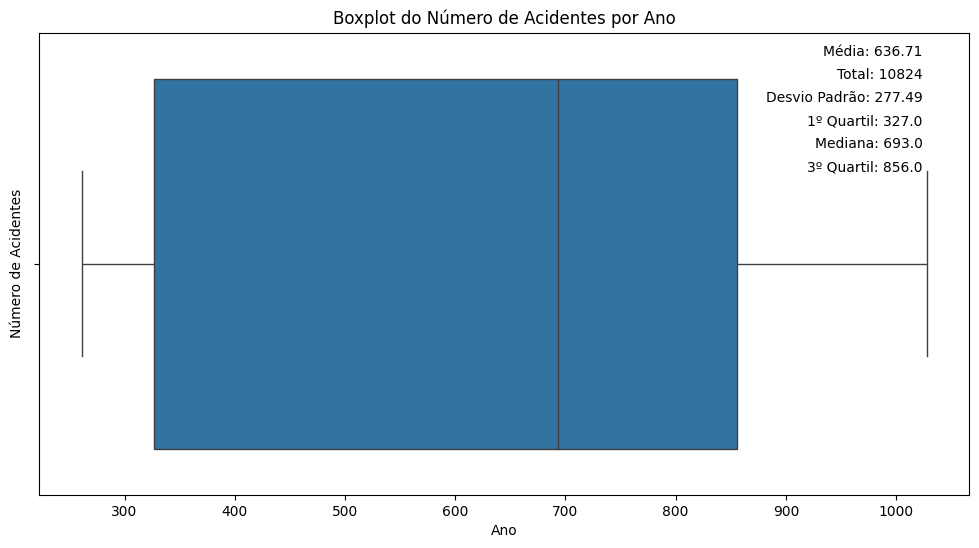

In [25]:
df['Ano'] = pd.to_datetime(df['Data_Ocorrencia']).dt.year

# Contar o número de acidentes por ano
acidentes_por_ano = df.groupby('Ano').size().reset_index(name='Número de Acidentes')

# Criar o boxplot para o número de acidentes por ano
plt.figure(figsize=(12, 6))
sns.boxplot(x='Número de Acidentes', data=acidentes_por_ano)
plt.title('Boxplot do Número de Acidentes por Ano')
plt.ylabel('Número de Acidentes')
plt.xlabel('Ano')

media = acidentes_por_ano['Número de Acidentes'].mean()
total = acidentes_por_ano['Número de Acidentes'].sum()
desvio_padrao = acidentes_por_ano['Número de Acidentes'].std()
quartil_1 = acidentes_por_ano['Número de Acidentes'].quantile(0.25)
mediana = acidentes_por_ano['Número de Acidentes'].median()
quartil_3 = acidentes_por_ano['Número de Acidentes'].quantile(0.75)

plt.text(0.95, 0.95, f'Média: {media:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.9, f'Total: {total}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f'Desvio Padrão: {desvio_padrao:.2f}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.8, f'1º Quartil: {quartil_1}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.75, f'Mediana: {mediana}', transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.7, f'3º Quartil: {quartil_3}', transform=plt.gca().transAxes, ha='right')

plt.show()

###Durante o período de 2004 á 2020, por ano, ao todo foram registradas 10824 ocorrências, o gráfico também nos apresenta uma variância de 327 á 856 acidentes ao ano, e ficando com uma média de 636,71 ocorrências anuais.

###A alta diferença da mediana e da média se da por conta do valor 277,49 apresentado no desvio padrão, e isso se da pelo fato de que durante o periodo de 2004 á 2010 os registros de acidentes anuais não passavam de 600, já em 2011 os acidentes foram aumentando ainda mais.

#Regressão linear - Relação do número de acidentes e os anos decorrentes

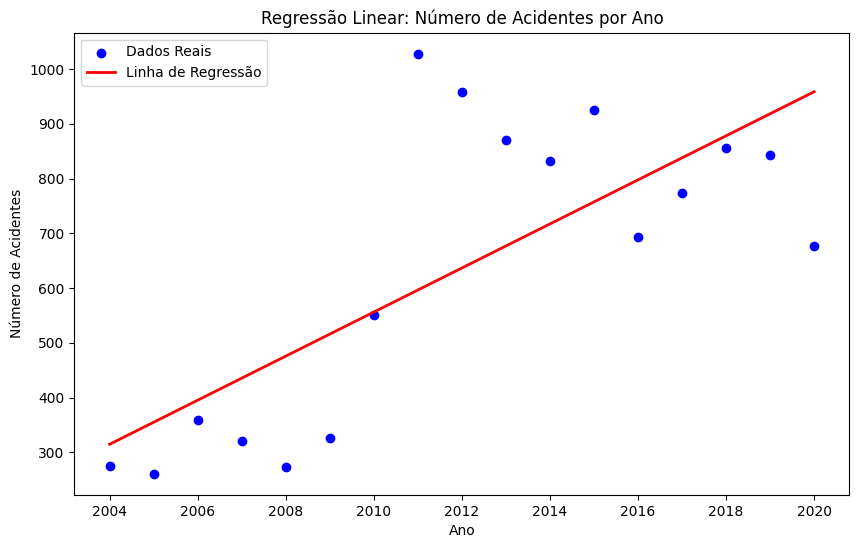

Coeficiente (Inclinação): 40.24019607843138
Intercepção: -80326.56862745101


In [26]:
df['Ano'] = pd.to_datetime(df['Data_Ocorrencia']).dt.year

# Contar o número de acidentes por ano
acidentes_por_ano = df.groupby('Ano').size().reset_index(name='Total_de_Acidentes')

X = acidentes_por_ano['Ano'].values.reshape(-1, 1)
y = acidentes_por_ano['Total_de_Acidentes'].values

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Número de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.legend(loc='upper left')
plt.show()

# Exibir os dados
print(f'Coeficiente (Inclinação): {modelo.coef_[0]}')
print(f'Intercepção: {modelo.intercept_}')

###Os resultados da regressão linear indicam que, em média, o número de acidentes ferroviários aumenta em aproximadamente 40 por ano.

###O valor do coeficiente indica que, para cada ano que passa, o número de acidentes aumenta em média em cerca de 40 acidentes. Isso sugere uma tendência preocupante de crescimento no número de acidentes ferroviários ao longo do tempo.

###A principal conclusão que podemos tirar desses resultados é que o número de acidentes ferroviários está aumentando com o passar dos anos. Se essa tendência continuar, é provável que vejamos mais acidentes, o que sugere que precisamos tomar medidas preventivas e melhorar a segurança nas ferrovias.

###Um dos motivos para esse aumento gradativo nos acidentes ao decorrer dos anos pode estar relacionado ao volume de tráfego ferroviário, com mais trens e carga sendo transportados, isso pode aumentar a probabilidade de acidentes devido ao maior uso da infraestrutura ferroviária. Lembrando que esse pode ser apenas um de diversos outros fatores responsáveis pelos acidentes.

#Quebra de dados em conjunto de treino e conjunto de teste

In [27]:
# Tratar dados faltantes
df = df.dropna(subset=['Gravidade', 'Concessionaria', 'UF', 'Natureza', 'N_feridos', 'N_obitos'])

label_encoders = {}
categorical_features = ['Concessionaria', 'UF', 'Natureza', 'Perímetro_Urbano',
                        'Serviço_Transporte', 'Mercadoria',
                        'Equipagem', 'Outra_Ferrovia', 'PN']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Separar as características e o alvo
X = df[categorical_features + ['N_feridos', 'N_obitos']]
y = df['Gravidade']

le_gravidade = LabelEncoder()
y = le_gravidade.fit_transform(y)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred, target_names=le_gravidade.classes_))

# Exibir a importância das características
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importância das características:")
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

<ipython-input-27-0bedea025a6f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-27-0bedea025a6f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-27-0bedea025a6f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Acurácia: 0.8386789456970467

Relatório de Classificação:
               precision    recall  f1-score   support

         Não       0.83      0.88      0.85      1661
         Sim       0.86      0.79      0.82      1488

    accuracy                           0.84      3149
   macro avg       0.84      0.84      0.84      3149
weighted avg       0.84      0.84      0.84      3149

Importância das características:
Equipagem: 0.3609715442909854
N_obitos: 0.1227687126219703
Natureza: 0.10848588836796551
Mercadoria: 0.08387777821671177
N_feridos: 0.08220707224357442
Serviço_Transporte: 0.08182249615186749
Perímetro_Urbano: 0.05807969159162619
UF: 0.03874385753218612
Concessionaria: 0.03656379290032224
PN: 0.017737091575114567
Outra_Ferrovia: 0.008742074507676093


##Interpretação dos Resultados
###Relatório de Classificação

- Precisão (precision):
  - Para a classe "Não" (acidente não grave), a precisão é 0.83.
  - Para a classe "Sim" (acidente grave), a precisão é 0.86.
  - Isso significa que, dos acidentes que o modelo previu como graves, 86% realmente eram graves.

- Revocação (recall):
  - Para a classe "Não", a revocação é 0.88.
  - Para a classe "Sim", a revocação é 0.79.
  - Isso indica que o modelo conseguiu identificar 79% dos acidentes graves reais.

- F1-score:
  - Para a classe "Não", o F1-score é 0.85.
  - Para a classe "Sim", o F1-score é 0.82.
  - O F1-score é a média harmônica da precisão e da revocação, fornecendo uma medida equilibrada entre os dois.

- Acurácia (accuracy): 0.84.
  - Isso significa que o modelo acertou 84% das previsões totais.


##Importância das Características
###As características mais importantes para o modelo foram:

1. Equipagem: 0.36
  - A informação sobre o condutor do trem foi a característica mais influente na determinação da gravidade do acidente.

2. N_obitos: 0.12
  - O número de óbitos no acidente também foi uma característica importante.

3. Natureza: 0.11
  - A natureza do acidente (descarrilamento, colisão, etc.) influenciou significativamente a previsão.